<img src="task.png" width=700 />

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import *
import scipy.optimize as op

### Из задачи 7.2. Посчитаем все необходимые коэффициенты
<img src="koef.png" width=500/>
<img src="rec_depend.png" width=500/>


In [13]:
h = 0.005
N = int(1/h)

x = np.array(np.linspace(0, 1, N))

p = np.array([0 for xn in x])
q = np.array([-(10 + np.sin(2*np.pi*xn)) for xn in x])
f = np.array([np.cos(2*np.pi*xn) for xn in x])

a = 1 - 1/2 * p * h
b = 2 - q * h**2
c = 1 + 1/2 * p * h
phi = f * h**2

alpha = np.zeros(N)
beta  = np.zeros(N)
gamma = np.zeros(N)
alpha[1] = c[0]/b[0]
beta[1] = -phi[0]/b[0]
gamma[1] = a[0]/b[0]

for k in range(1, N - 1):
    alpha[k+1] = c[k]/(b[k] - alpha[k]*a[k])
    beta[k+1] = (a[k]*beta[k] - phi[k]) / (b[k] - alpha[k]/a[k])
    gamma[k+1] = a[k]*gamma[k] / (b[k] - alpha[k]*a[k])

<img src="mu_nu_koef.png" width=500/>

In [14]:
mu = np.zeros(N)
nu = np.zeros(N)

mu[N-1] = -c[N-1] / (a[N-1]*(alpha[N-1] + gamma[N-1]) - b[N-1])
nu[N-1] = (phi[N-1] - a[N-1]*beta[N-1]) / (a[N-1]*(alpha[N-1] + gamma[N-1]) - b[N-1])

for n in range(N - 1, 0, -1):
    mu[n-1] = alpha[n]*mu[n] + gamma[n]*mu[N-1]
    nu[n-1] = beta[n] + alpha[n]*nu[n] + gamma[n]*nu[N-1]

### Решение


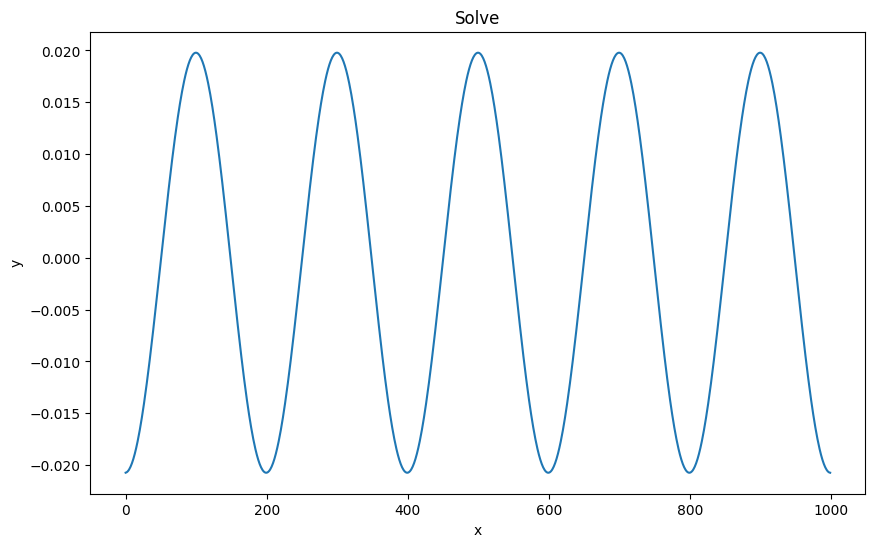

In [25]:
y = np.zeros(N)

y[0] = nu[0] / (1 - mu[0])
y[N-1] = mu[N-1]*y[0] + nu[N-1]

for n in range(N - 1, 0, -1):
    y[n-1] = alpha[n]*y[n] + beta[n] + gamma[n]*y[N-1]


y = np.tile(y, 5)
n = np.linspace(0, 5 * N - 1, 5 * N, dtype = np.float64)

plt.figure(figsize=(10, 6))
plt.plot(n, y)

plt.title("Solve")
plt.xlabel('x')
plt.ylabel('y')
plt.show()